**SIG742: Modern Data Science**


Deakin University Trimester 2, 2023


School of IT Assessment Task 2 (Full Mark: 100)



Unit Team: SIG 742


**Group Names :

Ramchandar Mariappan -223914532

Uthara Ravichanthar -


Simranjit Singh -

**Instructions**
Assignment Questions

There are total 2 parts in this assessment task:

Part 1 The first part will focus on the data acquisition and manipulation which includes the numpy, the
pandas, the Data Wrangling, the EDA from M03, and M04.

Part 2 The second part will require to perform the time series analysis exercise, which includes the time
series, the ARIMA, the Isolation Forest M05.


**Part I**
Data Acquisition and Manipulation

There are 10 questions in this part for total 60 marks, and each question is for 5 marks.

The quality of your explanation in the report and video will be 10 marks for all questions. You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.

**Dataset:**
The (Item_listing_category.zip) data used for this part could be found in here. You will need to use Pandas to read the unzipped (csv) data for starting.


**Pre requisites and prepartaion**

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#download the file from gitbug
import os
os.system("wget https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip")

0

In [4]:
import os
current_directory = os.getcwd()
print(current_directory)


/content


In [5]:
import zipfile
import pandas as pd

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/item_listing_category.zip"

# Specify the directory where you want to extract the contents
extracted_dir_path = "/content"

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Specify the path to the CSV file within the extracted contents
csv_file_path = os.path.join(extracted_dir_path, "item_list.csv")



In [6]:
#read the csv file.
item_list_df =pd.read_csv("/content/item_listing_category.csv")

In [7]:
#Loading top data
item_list_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


In [8]:
#Loading bottom data
item_list_df.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
355803,760377,Beats By Dre Solo White,3,"Electronics/TV, Audio & Surveillance/Headphones",Beats,45.0,1,beats dre solo white gently used work great
355804,780889,4 New Leap Frog Leapster Learning Games,1,Kids/Toys/Learning & Education,Leap Frog,9.0,1,viewing 4 new leap frog leapster learning game...
355805,650579,Torrid bra size 42ddd,3,Women/Underwear/Bras,Torrid,20.0,1,couple places lace snagged tell fairly good co...
355806,481154,Vans shoes,2,Men/Shoes/Fashion Sneakers,VANS,23.0,0,size 11
355807,361073,Kendra Scott Alex earrings in Magenta,2,Women/Jewelry/Earrings,Kendra Scott,38.0,1,description yet


In [9]:
# Get information about the dataset
item_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


From the information above, first checking the data types
1. There are integers, float and object classification of variables by python.
2. The train_id may not be a required column, so it will be dropped from the data fram
3. item condition id - ranges from 1 to 5 as values
4. price - right classification to be on float so changes are required
5. shipping is more binary 0 and 1
6. Rest are classified as object variables and there is no changes needed

In [10]:
# Describing the dataset
item_list_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
train_id,355808.0,NaN,NaN,NaN,593110.518215,342519.488239,1.0,296508.25,593288.5,890472.25,1186024.0
name,355808,277067,Bundle,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_condition_id,355808.0,NaN,NaN,NaN,1.910128,0.904,1.0,1.0,2.0,3.0,5.0
category_name,354269,1135,"Women/Athletic Apparel/Pants, Tights, Leggings",14336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_name,203852,3046,PINK,13376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,355808.0,NaN,NaN,NaN,26.661885,38.146767,0.0,10.0,17.0,29.0,2000.0
shipping,355808.0,NaN,NaN,NaN,0.446151,0.497092,0.0,0.0,0.0,1.0,1.0
clean_description,355614,267826,description yet,19868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we focus on Price , mostly that is the target variable . The mean is around 26 and at 75% ut is 29 and have some max of 2000. Obvioulsly there seems to be outliers since the 75% is almost close to the mean

In [11]:
#check for null values
item_list_df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          1539
brand_name           151956
price                     0
shipping                  0
clean_description       194
dtype: int64

In [12]:
#Identify total length to use for percentage calculations
leng_item_list_df = len(item_list_df)
print(leng_item_list_df)

355808


In [13]:
Percentage_null= item_list_df.isnull().sum()/leng_item_list_df*100

In [14]:
#Percentage of teh null values
Percentage_null

train_id              0.000000
name                  0.000000
item_condition_id     0.000000
category_name         0.432537
brand_name           42.707303
price                 0.000000
shipping              0.000000
clean_description     0.054524
dtype: float64

While category_name has  0.4% null values which can be imputed but the brand_name has 42% null values which can't be imputed. so i wil be imputing as "unknown" . Clean description has 0.05% of null values. All three columns that has null values are categorical and not numerical

In [15]:
# Identify for any duplicate values
item_list_df.duplicated().sum()

48572

In [16]:
#Identify what % of duplicates on the total
item_list_df.duplicated().sum()/leng_item_list_df*100

13.651182660311179

Around 13% duplicate values exist in the data set. It can be removed but the steps will be executed later

In [18]:
# Shape of the dataset
item_list_df.shape
print(f"The total number of rows " ,item_list_df.shape[0], "and total number of columns", item_list_df.shape[1])

The total number of rows  355808 and total number of columns 8


<Axes: title={'center': 'price distribution plot'}, xlabel='price', ylabel='Density'>

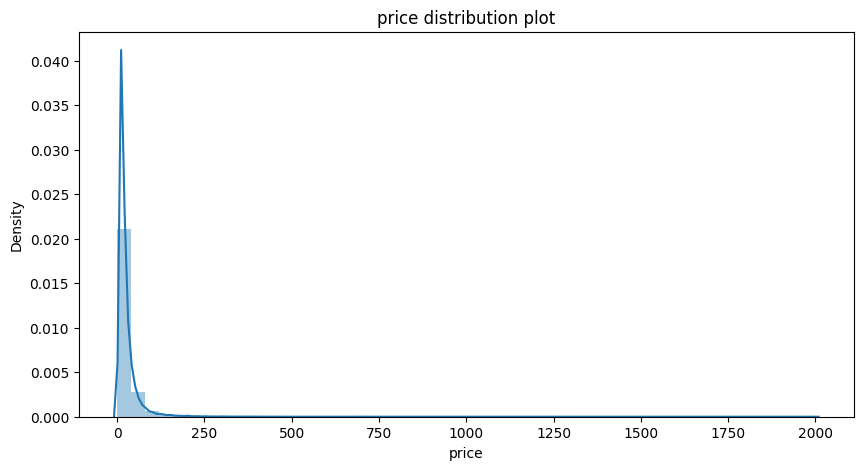

In [23]:
#plot age, account_balance, duration
plt.figure(figsize=(10,5))
plt.title("price distribution plot")
sns.distplot(item_list_df['price'])

In [24]:
item_list_df['price'].skew()

11.429698667933051

 A skewness value of 11.429698667933051 indicates a highly positively skewed distribution, as it is significantly greater than 1

<Axes: >

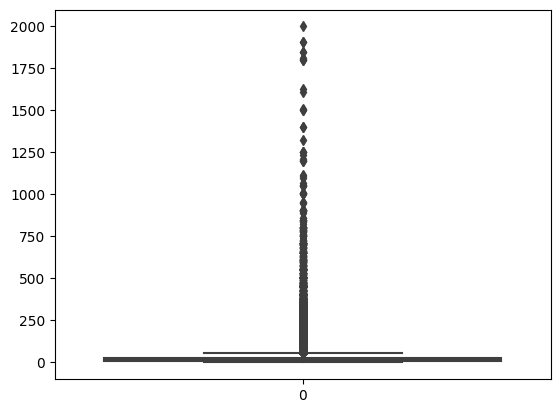

In [25]:
# Outlier checking
sns.boxplot(item_list_df.price)

It is very clear the price has a good outlier in the dataset. For any modelling this needs to be treated

In [27]:
#split categorical variables and numerical variables
cat=[]
num=[]
for i in item_list_df.columns:
  if item_list_df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print(cat)
print(num)

['name', 'category_name', 'brand_name', 'clean_description']
['train_id', 'item_condition_id', 'price', 'shipping']


Questions and Answers:

**Question 1. 1**


Find the missing values:
• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

----------------

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

**Answer for identifying the missing values columns**

In [34]:
# Define the missing_values_table function
def missing_values_table(item_list_df):
    # Calculate the total number of missing values per column
    missing_count = item_list_df.isnull().sum()

    # Filter columns with missing values (count > 0)
    missing_count = missing_count[missing_count > 0]

    # Calculate the percentage of missing values per column
    missing_percentage = (missing_count / len(item_list_df)) * 100

    # Create a DataFrame to display the missing value information
    missing_table = pd.DataFrame({
        'Missing Values rows': missing_count,
        'Missing Values Percentage': missing_percentage
    })

    return missing_table

# Use the missing_values_table function
missing_info = missing_values_table(item_list_df)

# Print the missing value information
print("Missing Values Information:")
print(missing_info)


Missing Values Information:
                   Missing Values rows  Missing Values Percentage
category_name                     1539                   0.432537
brand_name                      151956                  42.707303
clean_description                  194                   0.054524


**Answer for commenting on whether imputation can be done using mean values**

In [35]:
item_list_df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [36]:
item_list_df['brand_name'].value_counts()

PINK                 13376
Nike                 13182
Victoria's Secret    11544
LuLaRoe               7272
Apple                 3962
                     ...  
Cotton Express           1
Gold's Gym               1
Audi                     1
Alstyle Apparel          1
Doncaster                1
Name: brand_name, Length: 3046, dtype: int64

In [37]:
item_list_df['clean_description'].value_counts()

description yet                                                                                                                                                                                                                                                                                 19868
brand new                                                                                                                                                                                                                                                                                        1285
new                                                                                                                                                                                                                                                                                              1281
good condition                                                                                                        

All three variables which has missing values are categorical. Categorical variables cannot be imputed using a mean approach. Mean approach can be used only for continous variables

Mode Imputation: This is a common choice when dealing with categorical data.
K-Nearest Neighbors (K-NN) Imputation: This method imputes missing categorical values based on the categories of their nearest neighbors in the dataset

**Question 1. 2**

Find the price information from the data:

• Write code to print the median price of the items in the data;

• What is the 90th percentile value on the price;

• Draw the histogram chart for the price of the items in the data with 50 bins.


Answer for Q: • Write code to print the median price of the items in the data;

In [40]:
median_price = item_list_df['price'].median()
print(f'The median price of the items in the data is', median_price)

The median price of the items in the data is 17.0


Answer for Q: • What is the 90th percentile value on the price;


In [44]:
# Calculate the 90th percentile using numpy.percentile
percentile_90 = np.percentile(item_list_df['price'], 90)
print(f'90th Percentile Price:', percentile_90)


90th Percentile Price: 51.0


Answer for Q: Draw the histogram chart for the price of the items in the data with 50 bins.

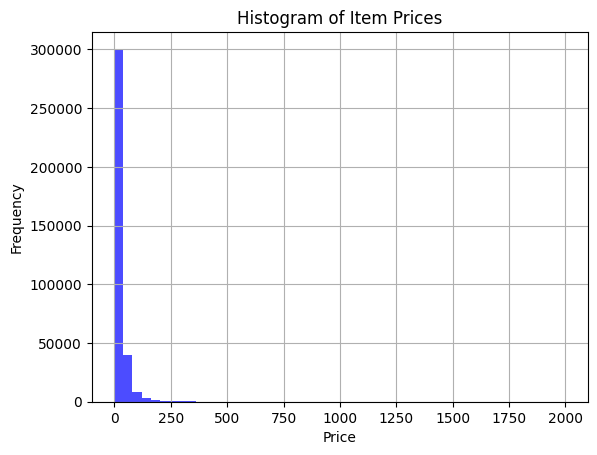

In [47]:
# Specify the number of bins
num_bins = 50

# Plot the histogram
plt.hist(item_list_df['price'], bins=num_bins, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Item Prices')
plt.grid(True)

# Show the plot
plt.show()


Question 1.3
Exploring the shipping information from the data:

• Write code to find out the percentage of the items that are paid by the buyers.

• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).

• When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).


(Optional: You could use the subplot from EDA)

In [48]:
#Find the value counts of the shipping
item_list_df['shipping'].value_counts()

0    197064
1    158744
Name: shipping, dtype: int64

Answer for:  Write code to find out the percentage of the items that are paid by the buyers.

Please Note* Assuming when shipping is 0 - then paid by buyers & 1 - then paid by sellers [ This is not given in the problem statement]

In [57]:
#Taking the first value which is shipping as 0
items_buyers = item_list_df['shipping'].value_counts()[0]
#identifying the total records using the len function
leng_item_list_df = len(item_list_df)
#percentage is dividing the first value from the value counts and the total
#records found using len function. Also it is rounded for 2 digits
Percentage_buyers = round(items_buyers/leng_item_list_df*100,2)
#print function to print the value
print(f'The percentage of items that are paid by buyers',Percentage_buyers, '%')

The percentage of items that are paid by buyers 55.38 %


Answer for: Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).

Please Note* Assuming when shipping is 0 - then paid by buyers & 1 - then paid by sellers [ This is not given in the problem statement]



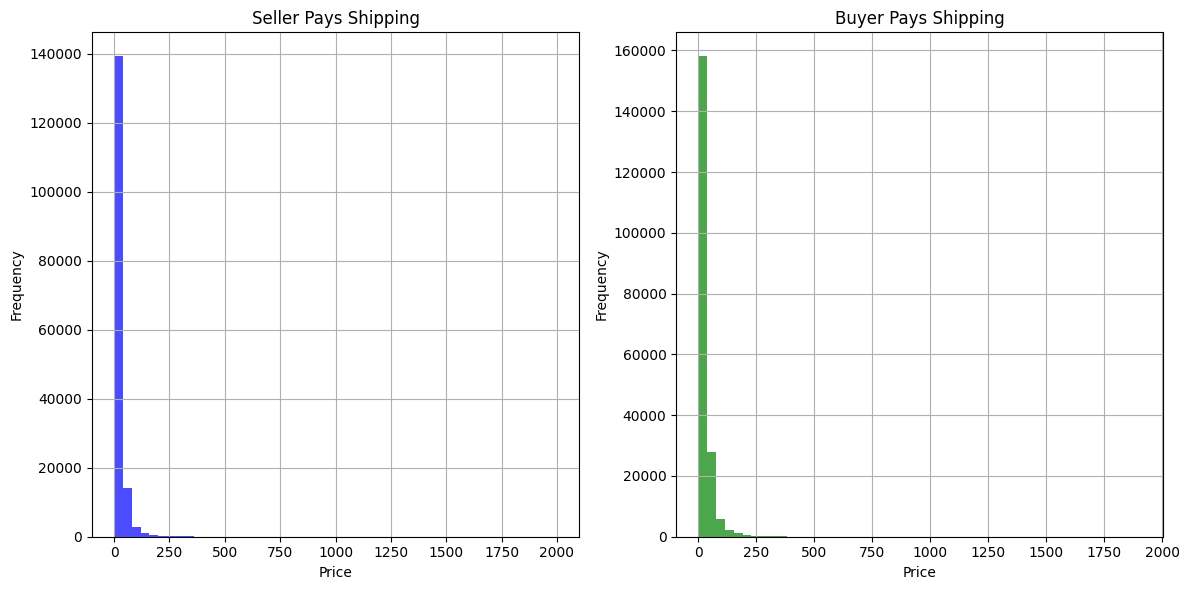

In [59]:
# Filter the DataFrame to separate data based on shipping category
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price']
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price']

# Specify the number of bins (50 in this case)
num_bins = 50

# Create subplots for side-by-side histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for seller pays shipping
axs[0].hist(seller_pays_shipping, bins=num_bins, color='blue', alpha=0.7)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Seller Pays Shipping')
axs[0].grid(True)

# Plot the histogram for buyer pays shipping
axs[1].hist(buyer_pays_shipping, bins=num_bins, color='green', alpha=0.7)
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Buyer Pays Shipping')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Answer for : When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

In [60]:
# Filter the DataFrame to separate data based on shipping category
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price'].median()
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price'].median()

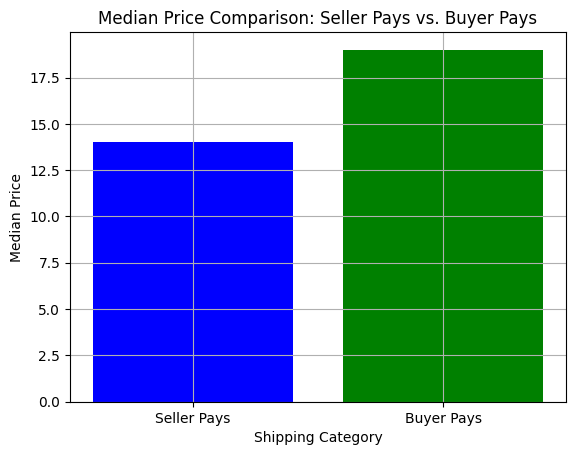

On comparison of when the price is higher between seller and buyer pays for shipping:

The median price when seller pays is 14.0
The median price when buyer pays is 19.0
On average, items paid by buyers have a higher median price.


In [67]:

# Filter the DataFrame for items paid by sellers and buyers
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price']
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price']

# Calculate the median price for each category
median_price_seller_pays = seller_pays_shipping.median()
median_price_buyer_pays = buyer_pays_shipping.median()
# Create a bar plot to compare median prices
plt.bar(['Seller Pays', 'Buyer Pays'], [median_price_seller_pays, median_price_buyer_pays], color=['blue', 'green'])
plt.xlabel('Shipping Category')
plt.ylabel('Median Price')
plt.title('Median Price Comparison: Seller Pays vs. Buyer Pays')
plt.grid(True)

# Show the plot
plt.show()

# Calculate the price difference
price_difference = median_price_buyer_pays - median_price_seller_pays

# Report the results
print(f'On comparison of when the price is higher between seller and buyer pays for shipping:\n')
print(f'The median price when seller pays is', median_price_seller_pays)
print(f'The median price when buyer pays is', median_price_buyer_pays)
if price_difference < 0:
    print("On average, items paid by sellers have a higher median price.")
elif price_difference > 0:
    print("On average, items paid by buyers have a higher median price.")
else:
    print("There is no significant difference in the median prices.")
